# Script pré-traitement des données et apprentissage du thème sur la colonne description (suppression de tous les doublons)

## Modules à importer

In [1]:
import pandas as pd
import nltk
import string
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator, TransformerMixin
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import FrenchStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline, FeatureUnion, make_pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

## Lecture du fichier CSV et création de la dataframe

In [2]:
opinion_df = pd.read_csv ("./data_website_tab.csv", sep="\t", names=["titre", "description","position","theme"],dtype={"titre":"object","description":"object","position":"category","theme":"category"},header=None)

## Suppression des lignes vides

In [3]:
opinion_df_clean = opinion_df.dropna(how='any')

## Récupération des index des lignes sans texte ne contenant que des espaces

In [4]:
opinion_df_spaces = opinion_df_clean[(opinion_df_clean.description == " ") |(opinion_df_clean.description == "  ")]

## Suppression des lignes ayant uniquement des espaces

In [5]:
opinion_df_clean2 = opinion_df_clean.drop(index=opinion_df_spaces.index)

## Remplacement du jeu de données initial par le jeu de données nettoyé

In [6]:
opinion_df= opinion_df_clean2

## Nombre de lignes pour chaque thème avant suppression des doublons

In [7]:
opinion_df.theme.value_counts()

elevage                    2214
chasse                     1765
zoo-cirque                  748
mer-pisciculture            712
animaux-de-compagnie        687
droit-animal                653
corrida                     511
experimentation-animale     268
Name: theme, dtype: int64

## Nombre total de thèmes avant suppression 

In [8]:
opinion_df.theme.count()

7558

In [9]:
opinion_df.head(30)

,titre,description,position,theme
0,Le député Loïc Dombreval demande au gouverneme...,.@LoicDombreval se prononce pour une anticipa...,Agit pour les animaux,elevage
1,Ces maires ont attribué une délégation conditi...,Ces maires ont attribué à un conseiller ou un...,Agit pour les animaux,droit-animal
2,Tribune en faveur de la censure du débat publi...,"Soutien assumé à la convention « Déméter », d...",Agit contre les animaux,elevage
3,Proposition de loi n°1896 visant à abolir l’él...,"En France, il est interdit de fabriquer et ve...",Agit pour les animaux,elevage
4,3 Députés demandent au gouvernement d'intégrer...,Question écrite de M. Dimitri Houbron député ...,Agit pour les animaux,mer-pisciculture
5,3 Députés demandent au gouvernement d'intégrer...,Question écrite de M. Dimitri Houbron député ...,Agit pour les animaux,elevage
6,Le sénateur Arnaud Bazin demande des explicati...,Question écrite n° 18999 de M. Arnaud Bazin ...,Agit pour les animaux,experimentation-animale
7,La ville de Montpellier vote un vœu visant à i...,Le Conseil municipal de la ville de Montpelli...,Agit pour les animaux,zoo-cirque
8,"Éric Piolle, maire de Grenoble, soutient le Ré...",Dans une vidéo publiée sur le compte Twitter ...,Agit pour les animaux,droit-animal
9,"Anne Hidalgo, maire de Paris, et Christophe Na...",À l'occasion de la journée mondiale des anima...,Agit pour les animaux,droit-animal


## Suppression totale de tout texte dupliqué de la colonne description

In [10]:
opinion_df_clean3 = opinion_df.drop_duplicates(subset=['description'], keep=False)

In [11]:
opinion_df_clean3.head(30)

,titre,description,position,theme
0,Le député Loïc Dombreval demande au gouverneme...,.@LoicDombreval se prononce pour une anticipa...,Agit pour les animaux,elevage
1,Ces maires ont attribué une délégation conditi...,Ces maires ont attribué à un conseiller ou un...,Agit pour les animaux,droit-animal
2,Tribune en faveur de la censure du débat publi...,"Soutien assumé à la convention « Déméter », d...",Agit contre les animaux,elevage
3,Proposition de loi n°1896 visant à abolir l’él...,"En France, il est interdit de fabriquer et ve...",Agit pour les animaux,elevage
6,Le sénateur Arnaud Bazin demande des explicati...,Question écrite n° 18999 de M. Arnaud Bazin ...,Agit pour les animaux,experimentation-animale
7,La ville de Montpellier vote un vœu visant à i...,Le Conseil municipal de la ville de Montpelli...,Agit pour les animaux,zoo-cirque
8,"Éric Piolle, maire de Grenoble, soutient le Ré...",Dans une vidéo publiée sur le compte Twitter ...,Agit pour les animaux,droit-animal
9,"Anne Hidalgo, maire de Paris, et Christophe Na...",À l'occasion de la journée mondiale des anima...,Agit pour les animaux,droit-animal
10,Tours baptise un jardin du nom de l'éléphant F...,Extrait du site de la ville de Tours : Homma...,Agit pour les animaux,droit-animal
11,La ville de Pessac adopte une motion «en faveu...,CONSEIL MUNICIPAL DU MARDI 29 SEPTEMBRE 2020 ...,Agit pour les animaux,droit-animal


## Nombre de lignes pour chaque theme après suppression des doublons 

In [12]:
opinion_df_clean3.theme.value_counts()

elevage                    1565
chasse                     1444
zoo-cirque                  681
animaux-de-compagnie        489
corrida                     451
droit-animal                407
mer-pisciculture            337
experimentation-animale     204
Name: theme, dtype: int64

## Nombre total de themes après suppression 

In [13]:
opinion_df_clean3.theme.count()

5578

## Remplacement des index 

In [14]:
opinion_df_clean3 = opinion_df_clean3.reset_index(drop=True)

## Remplacement le jeu de données initial par le jeu de données nettoyé

In [15]:
opinion_df = opinion_df_clean3

In [16]:
opinion_df.head(30)

,titre,description,position,theme
0,Le député Loïc Dombreval demande au gouverneme...,.@LoicDombreval se prononce pour une anticipa...,Agit pour les animaux,elevage
1,Ces maires ont attribué une délégation conditi...,Ces maires ont attribué à un conseiller ou un...,Agit pour les animaux,droit-animal
2,Tribune en faveur de la censure du débat publi...,"Soutien assumé à la convention « Déméter », d...",Agit contre les animaux,elevage
3,Proposition de loi n°1896 visant à abolir l’él...,"En France, il est interdit de fabriquer et ve...",Agit pour les animaux,elevage
4,Le sénateur Arnaud Bazin demande des explicati...,Question écrite n° 18999 de M. Arnaud Bazin ...,Agit pour les animaux,experimentation-animale
5,La ville de Montpellier vote un vœu visant à i...,Le Conseil municipal de la ville de Montpelli...,Agit pour les animaux,zoo-cirque
6,"Éric Piolle, maire de Grenoble, soutient le Ré...",Dans une vidéo publiée sur le compte Twitter ...,Agit pour les animaux,droit-animal
7,"Anne Hidalgo, maire de Paris, et Christophe Na...",À l'occasion de la journée mondiale des anima...,Agit pour les animaux,droit-animal
8,Tours baptise un jardin du nom de l'éléphant F...,Extrait du site de la ville de Tours : Homma...,Agit pour les animaux,droit-animal
9,La ville de Pessac adopte une motion «en faveu...,CONSEIL MUNICIPAL DU MARDI 29 SEPTEMBRE 2020 ...,Agit pour les animaux,droit-animal


## Extraction pour thème

In [17]:
X = opinion_df[["description"]]
y = opinion_df.theme

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Création des différentes fonctions utilisées

In [19]:
class SingleColumnSelector(BaseEstimator, TransformerMixin):
    def __init__(self, key):
        self.key = key
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, data_dict):
        return data_dict[self.key]

In [20]:
def split_into_tokens_nltk(desc) :
    return word_tokenize(desc)

In [21]:
fs = FrenchStemmer()
def split_into_stems(desc):
    words = word_tokenize(desc)
    return [fs.stem(w) for w in words]

## Liste des nombres et lois + signes de ponctuation

In [22]:
stopwords = open('stopwords_list.txt','r').read().split()
nblaw_stopwords = stopwords+list(string.punctuation)

## Pipeline pour la colonne description + transformation du texte en vecteurs avec Tfidfvectorizer

In [27]:
desc_vectorizer = TfidfVectorizer(tokenizer=split_into_stems,lowercase=True, stop_words=nblaw_stopwords,min_df=0.01)

description_pipeline = make_pipeline(
    # Sélection de la colonne description
    SingleColumnSelector(key="description"),
    desc_vectorizer
)

description_pipeline.fit(X_train)

Pipeline(memory=None,
         steps=[('singlecolumnselector',
                 SingleColumnSelector(key='description')),
                ('tfidfvectorizer',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=0.01, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_...
                                             '03633', '04654', '0507S', '0529G',
                                             '05860', '06227', '0635S', '06657',
                                             '06942', '0714G', '07714', '07795',
                                             '08060', '08152', '08361', '09384',
                                             '

## Affichage des traits

In [28]:
res = description_pipeline.transform(X_test.head())
print("Input descriptions")
print(X_test.description.head())
print("Output bags of words")

bow = pd.DataFrame(res.toarray(), columns=desc_vectorizer.get_feature_names())
bow.set_index(X_test.head().index, inplace=True)
bow.replace(0, np.nan).dropna(axis=1, how='all').fillna(0)

Input descriptions
1167     La droite normande présente des listes commun...
4180     A quelque quarante kilomètres de la ferme des...
459      Cet amendement a pour objet d’interdire certa...
3830     Question avec demande de réponse écrite de Co...
1788     Extraits de l'article de François Astorg, Le ...
Name: description, dtype: object

Output bags of words


,'',...,1000,2017,``,a,accéler,afin,agir,agriculteur,...,à,écosystem,écrit,élevag,éleveur,étaient,étant,été,être,’
1167,0.000000,0.000000,0.000000,0.000000,0.000000,0.060789,0.00000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.087686,0.000000,0.000000
4180,0.000000,0.029323,0.260882,0.000000,0.000000,0.043058,0.07301,0.000000,0.000000,0.10943,...,0.136235,0.121594,0.000000,0.072531,0.000000,0.000000,0.000000,0.000000,0.000000,0.351354
459,0.000000,0.023862,0.000000,0.041926,0.000000,0.070080,0.00000,0.000000,0.047737,0.00000,...,0.086228,0.000000,0.000000,0.000000,0.000000,0.000000,0.044302,0.050544,0.023087,0.250183
3830,0.045001,0.000000,0.000000,0.000000,0.044701,0.079273,0.00000,0.042226,0.071999,0.00000,...,0.074316,0.000000,0.048869,0.000000,0.107336,0.000000,0.000000,0.000000,0.000000,0.000000
1788,0.000000,0.172836,0.000000,0.000000,0.000000,0.031725,0.00000,0.000000,0.000000,0.00000,...,0.111529,0.000000,0.000000,0.000000,0.000000,0.085627,0.000000,0.000000,0.000000,0.000000


## Statistiques textuelles + Pipeline

In [29]:
class TextStats(BaseEstimator, TransformerMixin):

    def fit(self, x, y=None):
        return self

    def transform(self, descs):
        return [{'stats_length': len(text),
                 'stats_num_sentences': text.count('.')+text.count('!')+text.count('?')}
                for text in descs]
    
stats_vectorizer = DictVectorizer()

stats_pipeline = make_pipeline(
    SingleColumnSelector(key="description"),
    TextStats(),
    stats_vectorizer
)

stats_pipeline.fit(X_train)

Pipeline(memory=None,
         steps=[('singlecolumnselector',
                 SingleColumnSelector(key='description')),
                ('textstats', TextStats()),
                ('dictvectorizer',
                 DictVectorizer(dtype=<class 'numpy.float64'>, separator='=',
                                sort=True, sparse=True))],
         verbose=False)

## Application de la pipeline pour les 5 premières instances de X_test

In [30]:
res = stats_pipeline.transform(X_test.head())
print("Input")
print(X_test.description.head())
print("Output")

stats = pd.DataFrame(res.toarray(), columns=stats_vectorizer.get_feature_names())
stats.set_index(X_test.head().index)

Input
1167     La droite normande présente des listes commun...
4180     A quelque quarante kilomètres de la ferme des...
459      Cet amendement a pour objet d’interdire certa...
3830     Question avec demande de réponse écrite de Co...
1788     Extraits de l'article de François Astorg, Le ...
Name: description, dtype: object

Output


,stats_length,stats_num_sentences
1167,399.0,2.0
4180,1728.0,16.0
459,2028.0,10.0
3830,1332.0,7.0
1788,1281.0,17.0


## Union des pipelines

In [31]:
union = FeatureUnion(transformer_list = [
        ("description_feature", description_pipeline),
        ("stats_features", stats_pipeline)
    ])

preprocess_pipeline = make_pipeline(
    union
)

preprocess_pipeline.fit(X_train)

Pipeline(memory=None,
         steps=[('featureunion',
                 FeatureUnion(n_jobs=None,
                              transformer_list=[('description_feature',
                                                 Pipeline(memory=None,
                                                          steps=[('singlecolumnselector',
                                                                  SingleColumnSelector(key='description')),
                                                                 ('tfidfvectorizer',
                                                                  TfidfVectorizer(analyzer='word',
                                                                                  binary=False,
                                                                                  decode_error='strict',
                                                                                  dtype=<class 'numpy.float64'>,
                                                               

## Application de la pipeline pour transformer les 5 premières instances de X_test

In [32]:
res = preprocess_pipeline.transform(X_test.head())
print("Input")
print(X_test.head())
print("Output")

all_features = pd.DataFrame(res.toarray(), 
                            columns=description_pipeline.named_steps['tfidfvectorizer'].get_feature_names()
                            + stats_pipeline.named_steps['dictvectorizer'].get_feature_names()
                           )
all_features.set_index(X_test.head().index, inplace=True)
all_features.replace(0, np.nan).dropna(axis=1, how='all').fillna(0)

Input
                                            description
1167   La droite normande présente des listes commun...
4180   A quelque quarante kilomètres de la ferme des...
459    Cet amendement a pour objet d’interdire certa...
3830   Question avec demande de réponse écrite de Co...
1788   Extraits de l'article de François Astorg, Le ...

Output


,'',...,1000,2017,``,a,accéler,afin,agir,agriculteur,...,écrit,élevag,éleveur,étaient,étant,été,être,’,stats_length,stats_num_sentences
1167,0.000000,0.000000,0.000000,0.000000,0.000000,0.060789,0.00000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.087686,0.000000,0.000000,399.0,2.0
4180,0.000000,0.029323,0.260882,0.000000,0.000000,0.043058,0.07301,0.000000,0.000000,0.10943,...,0.000000,0.072531,0.000000,0.000000,0.000000,0.000000,0.000000,0.351354,1728.0,16.0
459,0.000000,0.023862,0.000000,0.041926,0.000000,0.070080,0.00000,0.000000,0.047737,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.044302,0.050544,0.023087,0.250183,2028.0,10.0
3830,0.045001,0.000000,0.000000,0.000000,0.044701,0.079273,0.00000,0.042226,0.071999,0.00000,...,0.048869,0.000000,0.107336,0.000000,0.000000,0.000000,0.000000,0.000000,1332.0,7.0
1788,0.000000,0.172836,0.000000,0.000000,0.000000,0.031725,0.00000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.085627,0.000000,0.000000,0.000000,0.000000,1281.0,17.0


## Affichage du nombre de traits générés par chacune des chaines

In [33]:
fnames_desc = description_pipeline.named_steps['tfidfvectorizer'].get_feature_names()
fnames_stat = stats_pipeline.named_steps['dictvectorizer'].get_feature_names()
print('Nombres de traits extraits à partir de la colonne description :', len(fnames_desc))
print('Nombres de traits statistiques :', len(fnames_stat))

Nombres de traits extraits à partir de la colonne description : 2094
Nombres de traits statistiques : 2


## Comparaison des modèles

Mutinomial NB
                         precision    recall  f1-score   support

   animaux-de-compagnie       0.88      0.52      0.65       489
                 chasse       0.77      0.88      0.82      1444
                corrida       0.51      0.69      0.59       451
           droit-animal       0.87      0.25      0.39       407
                elevage       0.61      0.86      0.72      1565
experimentation-animale       0.78      0.25      0.38       204
       mer-pisciculture       0.93      0.29      0.45       337
             zoo-cirque       0.90      0.75      0.82       681

               accuracy                           0.71      5578
              macro avg       0.78      0.56      0.60      5578
           weighted avg       0.75      0.71      0.69      5578

accuracy 0.6854838709677419
confusion matrix
                          animaux-de-compagnie  chasse  corrida  droit-animal  \
animaux-de-compagnie                       42      11        3             1 

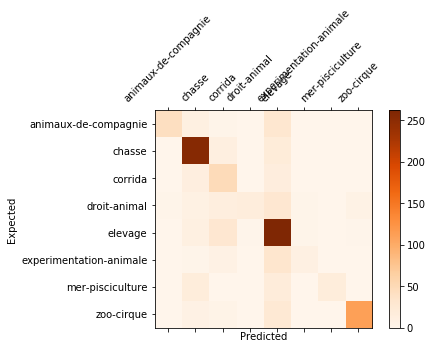

KNN
                         precision    recall  f1-score   support

   animaux-de-compagnie       0.10      0.12      0.11       489
                 chasse       0.25      0.39      0.31      1444
                corrida       0.09      0.05      0.06       451
           droit-animal       0.15      0.07      0.10       407
                elevage       0.32      0.35      0.33      1565
experimentation-animale       0.06      0.01      0.02       204
       mer-pisciculture       0.10      0.03      0.05       337
             zoo-cirque       0.21      0.12      0.15       681

               accuracy                           0.24      5578
              macro avg       0.16      0.14      0.14      5578
           weighted avg       0.22      0.24      0.22      5578

accuracy 0.22043010752688172
confusion matrix
                          animaux-de-compagnie  chasse  corrida  droit-animal  \
animaux-de-compagnie                        8      42        2             4   
chasse

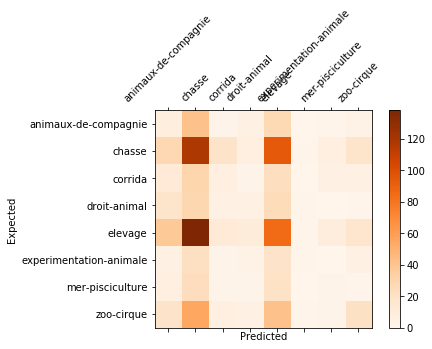

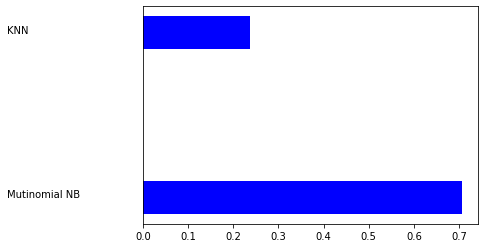

In [37]:
models = [
    ('Mutinomial NB', MultinomialNB()),
    ('KNN', KNeighborsClassifier()),
]

# Evaluation de chaque résultat l'un après l'autre
scores = []
names = []
scoring = 'accuracy'

# Validation croisée à 5 plis
kfold = model_selection.KFold(n_splits=5, shuffle=True)
for name, model in models:
    names.append(name)
    print(name)
    model_pipeline = make_pipeline(preprocess_pipeline,model)
    y_pred = model_selection.cross_val_predict(model_pipeline, X, y, 
                                               cv=kfold, n_jobs=2)
    print(classification_report(y, y_pred))
    acc = metrics.accuracy_score(y, y_pred)
    scores.append(acc)
    model_pipeline.fit(X_train, y_train)
    all_predictions = model_pipeline.predict(X_test)
    
    # all_predictions : classes prédites par l'algorithme d'apprentissage pour les données de test
    print('accuracy', accuracy_score(y_test, all_predictions))
    
    # Liste des labels (classes) se trouvant dans les données de test
    labels = np.unique(y_test)
    
    # Matrice de confusion
    cm =  confusion_matrix(y_test, all_predictions, labels=labels)
    
    # Matrice de confusion sous forme de DataFrame
    confusion_df = pd.DataFrame(cm, index=labels, columns=labels)
    print('confusion matrix\n', confusion_df)
    print('(row=expected, col=predicted)')
    labels = np.unique(y_test)
    cm = confusion_matrix(y_test, all_predictions, labels) 
    fig = plt.figure() 
    ax = fig.add_subplot(111) 
    cax = ax.matshow(cm, interpolation='nearest', cmap=plt.cm.Oranges) 
    fig.colorbar(cax) 
    tick_marks = np.arange(len(labels))
    labels_for_fig = [l for l in labels]
    plt.xticks(tick_marks, labels_for_fig, rotation=45)
    plt.yticks(tick_marks, labels_for_fig) 
    plt.xlabel('Predicted') 
    plt.ylabel('Expected')
    plt.show()
    
# Représentation graphique
indices = np.arange(len(scores))
fig = plt.figure()
plt.barh(indices, scores, .2, label="score", color='b')
plt.yticks(())
for i, c in zip(indices, names):
    plt.text(-.3, i, c)
plt.show()

## Chaîne de prétraitement globale sans les traits concernant les statistiques

In [38]:
description = FeatureUnion(transformer_list = [
        ("description_feature", description_pipeline),
    ])

preprocess_pipeline = make_pipeline(
    description
)

preprocess_pipeline.fit(X_train)

Pipeline(memory=None,
         steps=[('featureunion',
                 FeatureUnion(n_jobs=None,
                              transformer_list=[('description_feature',
                                                 Pipeline(memory=None,
                                                          steps=[('singlecolumnselector',
                                                                  SingleColumnSelector(key='description')),
                                                                 ('tfidfvectorizer',
                                                                  TfidfVectorizer(analyzer='word',
                                                                                  binary=False,
                                                                                  decode_error='strict',
                                                                                  dtype=<class 'numpy.float64'>,
                                                               

## Application de la pipeline pour transformer les 5 premières instances de X_test

In [39]:
res = preprocess_pipeline.transform(X_test.head())
print("Input")
print(X_test.head())
print("Output")

all_features = pd.DataFrame(res.toarray(), 
                            columns=description_pipeline.named_steps['tfidfvectorizer'].get_feature_names()                           )
all_features.set_index(X_test.head().index, inplace=True)
all_features.replace(0, np.nan).dropna(axis=1, how='all').fillna(0)

Input
                                            description
1167   La droite normande présente des listes commun...
4180   A quelque quarante kilomètres de la ferme des...
459    Cet amendement a pour objet d’interdire certa...
3830   Question avec demande de réponse écrite de Co...
1788   Extraits de l'article de François Astorg, Le ...

Output


,'',...,1000,2017,``,a,accéler,afin,agir,agriculteur,...,à,écosystem,écrit,élevag,éleveur,étaient,étant,été,être,’
1167,0.000000,0.000000,0.000000,0.000000,0.000000,0.060789,0.00000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.087686,0.000000,0.000000
4180,0.000000,0.029323,0.260882,0.000000,0.000000,0.043058,0.07301,0.000000,0.000000,0.10943,...,0.136235,0.121594,0.000000,0.072531,0.000000,0.000000,0.000000,0.000000,0.000000,0.351354
459,0.000000,0.023862,0.000000,0.041926,0.000000,0.070080,0.00000,0.000000,0.047737,0.00000,...,0.086228,0.000000,0.000000,0.000000,0.000000,0.000000,0.044302,0.050544,0.023087,0.250183
3830,0.045001,0.000000,0.000000,0.000000,0.044701,0.079273,0.00000,0.042226,0.071999,0.00000,...,0.074316,0.000000,0.048869,0.000000,0.107336,0.000000,0.000000,0.000000,0.000000,0.000000
1788,0.000000,0.172836,0.000000,0.000000,0.000000,0.031725,0.00000,0.000000,0.000000,0.00000,...,0.111529,0.000000,0.000000,0.000000,0.000000,0.085627,0.000000,0.000000,0.000000,0.000000


## Affichage du nombre de traits générés par chacune des chaines

In [40]:
fnames_desc = description_pipeline.named_steps['tfidfvectorizer'].get_feature_names()
print('Nombres de traits extraits à partir de la colonne description :', len(fnames_desc))

Nombres de traits extraits à partir de la colonne description : 2094


## Comparaison des modèles

Mutinomial NB
                         precision    recall  f1-score   support

   animaux-de-compagnie       0.92      0.64      0.76       489
                 chasse       0.76      0.97      0.85      1444
                corrida       0.97      0.76      0.85       451
           droit-animal       0.86      0.28      0.42       407
                elevage       0.71      0.96      0.82      1565
experimentation-animale       1.00      0.15      0.26       204
       mer-pisciculture       0.96      0.37      0.53       337
             zoo-cirque       0.94      0.86      0.90       681

               accuracy                           0.79      5578
              macro avg       0.89      0.62      0.67      5578
           weighted avg       0.83      0.79      0.77      5578

accuracy 0.8010752688172043
confusion matrix
                          animaux-de-compagnie  chasse  corrida  droit-animal  \
animaux-de-compagnie                       56      10        0             3 

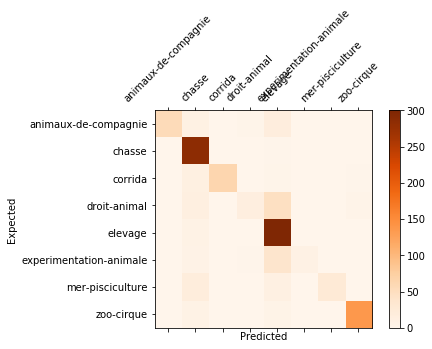

KNN
                         precision    recall  f1-score   support

   animaux-de-compagnie       0.72      0.79      0.75       489
                 chasse       0.83      0.88      0.86      1444
                corrida       0.82      0.81      0.82       451
           droit-animal       0.46      0.65      0.54       407
                elevage       0.86      0.82      0.84      1565
experimentation-animale       0.94      0.59      0.72       204
       mer-pisciculture       0.89      0.66      0.76       337
             zoo-cirque       0.90      0.81      0.85       681

               accuracy                           0.80      5578
              macro avg       0.80      0.75      0.77      5578
           weighted avg       0.82      0.80      0.80      5578

accuracy 0.8010752688172043
confusion matrix
                          animaux-de-compagnie  chasse  corrida  droit-animal  \
animaux-de-compagnie                       70       3        0             5   
chasse 

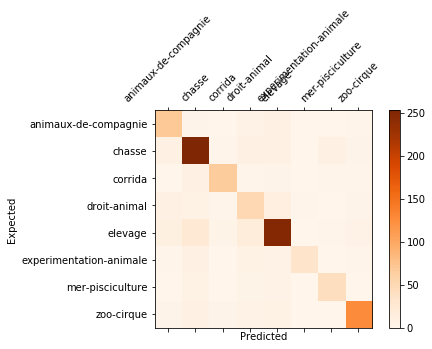

SVM
                         precision    recall  f1-score   support

   animaux-de-compagnie       0.91      0.88      0.90       489
                 chasse       0.91      0.96      0.94      1444
                corrida       0.97      0.90      0.94       451
           droit-animal       0.83      0.72      0.77       407
                elevage       0.88      0.96      0.92      1565
experimentation-animale       0.99      0.79      0.88       204
       mer-pisciculture       0.91      0.79      0.84       337
             zoo-cirque       0.97      0.93      0.95       681

               accuracy                           0.91      5578
              macro avg       0.92      0.87      0.89      5578
           weighted avg       0.91      0.91      0.91      5578

accuracy 0.9023297491039427
confusion matrix
                          animaux-de-compagnie  chasse  corrida  droit-animal  \
animaux-de-compagnie                       76       5        0             4   
chasse 

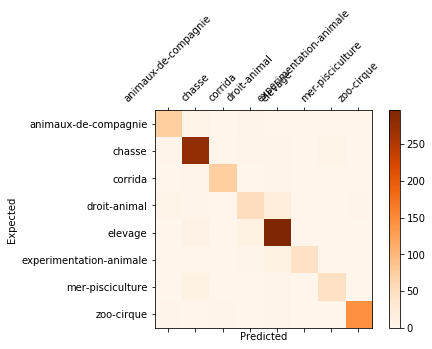

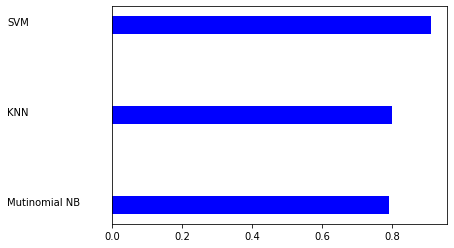

In [41]:
models = [
    ('Mutinomial NB', MultinomialNB()),
    ('KNN', KNeighborsClassifier()),
    ('SVM', svm.SVC(kernel='linear'))
]

# Evaluation de chaque résultat
scores = []
names = []
scoring = 'accuracy'

# Validation croisée à 5 plis
kfold = model_selection.KFold(n_splits=5, shuffle=True)
for name, model in models:
    names.append(name)
    print(name)
    model_pipeline = make_pipeline(preprocess_pipeline,model)
    y_pred = model_selection.cross_val_predict(model_pipeline, X, y, 
                                               cv=kfold, n_jobs=2)
    print(classification_report(y, y_pred))
    acc = metrics.accuracy_score(y, y_pred)
    scores.append(acc)
    model_pipeline.fit(X_train, y_train)
    all_predictions = model_pipeline.predict(X_test)
    
    # all_predictions : classes prédites par l'algorithme d'apprentissage pour les données de test
    print('accuracy', accuracy_score(y_test, all_predictions))
    
    # Liste des labels (classes) se trouvant dans les données de test
    labels = np.unique(y_test)
    
    # Matrice de confusion
    cm =  confusion_matrix(y_test, all_predictions, labels=labels)
    
    # Matrice de confusion sous forme de DataFrame
    confusion_df = pd.DataFrame(cm, index=labels, columns=labels)
    print('confusion matrix\n', confusion_df)
    print('(row=expected, col=predicted)')
    labels = np.unique(y_test)
    cm = confusion_matrix(y_test, all_predictions, labels) 
    fig = plt.figure() 
    ax = fig.add_subplot(111) 
    cax = ax.matshow(cm, interpolation='nearest', cmap=plt.cm.Oranges) 
    fig.colorbar(cax) 
    tick_marks = np.arange(len(labels))
    labels_for_fig = [l for l in labels]
    plt.xticks(tick_marks, labels_for_fig, rotation=45)
    plt.yticks(tick_marks, labels_for_fig) 
    plt.xlabel('Predicted') 
    plt.ylabel('Expected') 
    plt.show()
    
# Représentation graphique
indices = np.arange(len(scores))
fig = plt.figure()
plt.barh(indices, scores, .2, label="score", color='b')
plt.yticks(())
for i, c in zip(indices, names):
    plt.text(-.3, i, c)
plt.show()